## 1.Multi-class Classification

这个练习使用logistic regression和neural networls来识别手写数字（0-9）

### 1.1 Dataset

原始数据格式是Matlab的，因此再Python中加载要借助Scipy包

In [57]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [2]:
data = loadmat('ex3data1.mat')
data

{'X': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ..., 
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [52]:
X = data['X']
y = data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

可以看出，图像一共有5000幅，大小是20*20的矩阵，对应的y是5000个数字，而且数字10对应0

### 1.2 visualizing the data

In [60]:
def plot_an_image(image):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([])) # remove ticks
    plt.yticks(np.array([]))

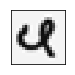

In [62]:
random_one = np.random.randint(0, 5000)
plot_an_image(X[random_one, :])
plt.show()

In [64]:
def plot_100_image(X):
    size = int(np.sqrt(X.shape[1]))
    
    # choose 100 samples from 5000
    sample_index = np.random.choice(np.arange(X.shape[0]), 100)
    samples = X[sample_index, :]
    
    fig, ax = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))
    
    for i in range(10):
        for j in range(10):
            ax[i][j].matshow(samples[10 * i + j].reshape((size, size)), cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

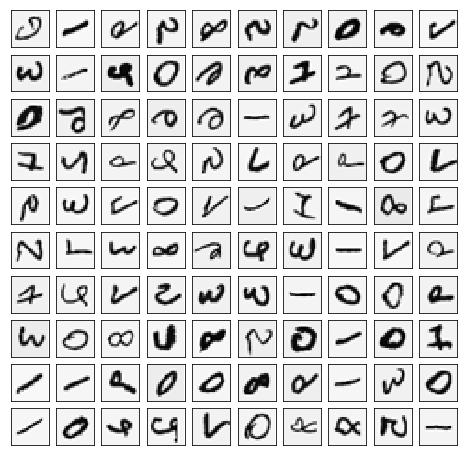

In [65]:
plot_100_image(X)
plt.show()

### 1.3 vectorizing logistic regression

将logistic regression向量化，提高计算效率

Sigmoid函数： $g\left( z\right) =\dfrac {1}{1+e^{-z}}$

In [20]:
def sigmoid(x):
    return 1 / (x + np.exp(-x))

cost function: $J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\dfrac {\lambda }{2m}\sum ^{m}_{j=1}\theta j^{2}$

In [22]:
def cost(X, y, theta, learning_rate):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta)
    m = X.shape[0]
    
    first = y * np.log(sigmoid(X * theta.T))
    second = (1 - y) * np.log(1 - sigmoid(X * theta.T))
    reg = (learning_rate) / (2 * m) * np.sum(np.power(theta[:, 1:], 2))
    return -1 / m * (first + second) + reg

向量化的梯度函数

In [33]:
def gradient(X, y, theta, alpha=0.01, iter_num=100, learning_rate=1):
    X= np.mat(X)
    y = np.mat(y).T
    theta = np.mat(theta).T
    m = X.shape[0]
    
    for i in range(iter_num):
        h = sigmoid(X*theta)
        error = h - y
        theta = theta*(1-alpha*learning_rate/m) - alpha * X.T * error / m
    return theta

### 1.4 one-vs-all classification

有了代价函数和梯度函数，就可以构造分类器了。这个任务共有10个类别，但是logistic regression一次只能分两类，因此需要采取多类分类的策略。

In [31]:
def one_vs_all(X, y, num_labels, alpha, iter_num, learning_rate):
    rows, params = X.shape
    
    all_theta = np.zeros((num_labels, params + 1))
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    for i in range(1, num_labels + 1):
        theta = np.zeros(params + 1)
        y_i = np.array([1 if label == i else 0 for label in y]).T
        theta = gradient(X, y_i, theta, alpha, iter_num, learning_rate).T
        all_theta[i-1, :] = theta
        
    return all_theta

In [43]:
all_theta = one_vs_all(X, y, 10, 0.01, 100, 1)
all_theta

array([[ -1.43973350e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -5.07993322e-07,   5.87218875e-08,   0.00000000e+00],
       [ -1.63059560e-01,   0.00000000e+00,   0.00000000e+00, ...,
          4.06184406e-06,  -3.43674303e-07,   0.00000000e+00],
       [ -1.63954779e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -8.47760892e-07,   6.55428719e-08,   0.00000000e+00],
       ..., 
       [ -1.70863738e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -9.10694401e-07,   7.11784447e-08,   0.00000000e+00],
       [ -1.59620611e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -8.98190476e-07,   7.03305864e-08,   0.00000000e+00],
       [ -1.68714833e-01,   0.00000000e+00,   0.00000000e+00, ...,
         -2.62482253e-06,   7.71957340e-08,   0.00000000e+00]])

### 1.4 one-vs-all prediction

有了分类器，下面就可以做预测了

In [44]:
def predict(X, all_theta):
    rows, params = X.shape
    
    X = np.insert(X, 0, values=np.ones(rows), axis=1)
    
    X = np.mat(X)
    all_theta = np.mat(all_theta)
    
    h = sigmoid(X * all_theta.T)
    
    h_argmax = np.argmax(h, axis=1) + 1
    
    return h_argmax

In [45]:
y_pred = predict(X, all_theta)
correct = [1 if a == b else 0 for(a, b) in zip(y_pred, y)]
accuracy = (sum(map(int ,correct))) / float(len(correct))
accuracy

0.7814

78.14%的正确率，不算太高

## 2.neural networks

logistic regression是线性分类器，无法构造复杂的假设，精度也会受到限制，而neural network是非线性分类器，可以构造更加复杂的假设，从而取得更高的精度

### 2.1 model represention

In [123]:
weights = loadmat('ex3weights.mat')
weights

{'Theta1': array([[ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
          -1.30529929e-05,  -5.04175101e-06,   2.80464449e-09],
        [ -9.83811294e-02,   7.66168682e-09,  -9.75873689e-09, ...,
          -5.60134007e-05,   2.00940969e-07,   3.54422854e-09],
        [  1.16156052e-01,  -8.77654466e-09,   8.16037764e-09, ...,
          -1.20951657e-04,  -2.33669661e-06,  -7.50668099e-09],
        ..., 
        [ -1.83220638e-01,  -8.89272060e-09,  -9.81968100e-09, ...,
           2.35311186e-05,  -3.25484493e-06,   9.02499060e-09],
        [ -7.02096331e-01,   3.05178374e-10,   2.56061008e-09, ...,
          -8.61759744e-04,   9.43449909e-05,   3.83761998e-09],
        [ -3.50933229e-01,   8.85876862e-09,  -6.57515140e-10, ...,
          -1.80365926e-06,  -8.14464807e-06,   8.79454531e-09]]),
 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
         -2.20823629,  0.56383834,  1.21105294,  2.21030997,  0.44456156,
         -1.18244872,  1

In [124]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [125]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)
X.shape, y.shape

((5000, 401), (5000, 1))

### 2.2 feedforward propagation and prediction

In [126]:
a1 = X

In [127]:
z2 = np.dot(a1, theta1.T)
z2.shape

(5000, 25)

In [128]:
a2 = sigmoid(z2)

In [129]:
a2 = np.insert(a2, 0, values=np.ones(a2.shape[0]), axis=1)
a2.shape

(5000, 26)

In [130]:
z3 = np.dot(a2, theta2.T)
a3 = sigmoid(z3)
a3.shape

(5000, 10)

预测

In [131]:
y_pred = np.argmax(a3, axis=1) + 1
y_pred.shape

(5000,)

准确率

In [134]:
correct = [1 if a == b else 0 for(a, b) in zip(y_pred, y)]
accuracy = (sum(map(int ,correct))) / float(len(correct))
accuracy

0.4944

不清楚为什么精度这么差，在找出问题的地方......